In [3]:
# Import fastbook functions, in our case we'll be using: search_images_ddg
from fastbook import *
# create a function that will take an arbitrary search term and return a list of urls.
def search_images(term, max=30):
  print(f"Searching for '{term}'")
  # search_images_ddg comes from fastbook: https://github.com/fastai/fastbook/blob/master/utils.py#L45
  return search_images_ddg(term, max_images=max)

In [18]:
urls = search_images('Nike Jordan shoe photos')
urls[0]

Searching for 'Nike Jordan shoe photos'


'https://i5.walmartimages.com/asr/7751d53a-6b1a-49b6-84ab-62c8b759b334_1.7ca177137c571a7338b48c6aeda3447c.jpeg?odnWidth=1000&odnHeight=1000&odnBg=ffffff'

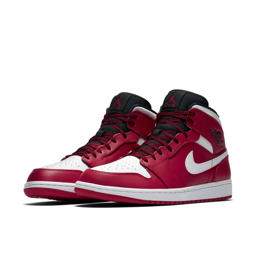

In [22]:
from fastdownload import download_url
dest = 'jordan.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'Nike Air Max photos'


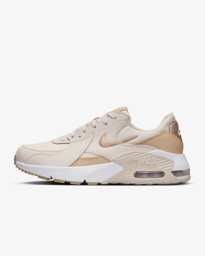

In [23]:
download_url(search_images('Nike Air Max photos')[0], 'airmax.jpg', show_progress=False)
Image.open('airmax.jpg').to_thumb(256,256)

Searching for 'Adidas Yeezy photos'


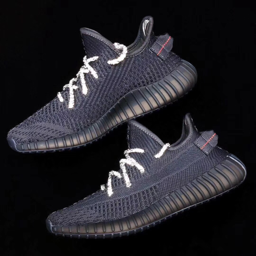

In [24]:
download_url(search_images('Adidas Yeezy photos')[0], 'yeezy.jpg', show_progress=False)
Image.open('yeezy.jpg').to_thumb(256,256)

In [25]:
searches = 'Nike Jordan Shoe','Adidas Yeezy Shoe', 'Nike Air Max Shoe'
path = Path('jordan_or_yeezy_or_airmax')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} wearing photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} used photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'Nike Jordan Shoe photo'
Searching for 'Nike Jordan Shoe wearing photo'
Searching for 'Nike Jordan Shoe used photo'
Searching for 'Adidas Yeezy Shoe photo'
Searching for 'Adidas Yeezy Shoe wearing photo'
Searching for 'Adidas Yeezy Shoe used photo'
Searching for 'Nike Air Max Shoe photo'
Searching for 'Nike Air Max Shoe wearing photo'
Searching for 'Nike Air Max Shoe used photo'


/Users/joshbelot/Documents/Deep Learning Course/Deep-Learning-Course/.venv/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

12

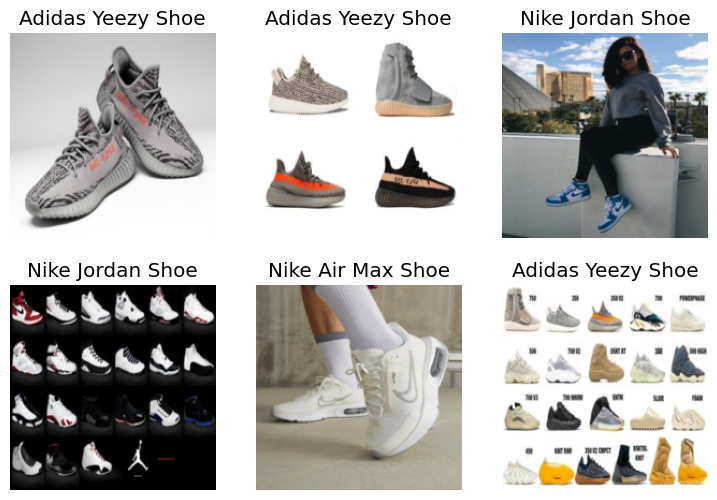

In [27]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [32]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.608669,1.169889,0.395833,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.869502,0.827430,0.333333,00:01
1,0.620699,0.656415,0.270833,00:01
2,0.446492,0.622151,0.270833,00:01
3,0.359207,0.559711,0.250000,00:01
4,0.283664,0.560942,0.208333,00:01
5,0.228458,0.583796,0.187500,00:01
6,0.185094,0.589208,0.208333,00:01
7,0.152549,0.589325,0.187500,00:01
8,0.127101,0.605323,0.208333,00:01
9,0.107216,0.600990,0.208333,00:01


In [36]:
shoe_type,_,probs = learn.predict(PILImage.create('airmax.jpg'))
print(f"This is a: {shoe_type}.")
print(f"Probability it's a {shoe_type}: {probs[0]:.4f}")

This is a: Nike Air Max Shoe.
Probability it's a Nike Air Max Shoe: 0.0006
